# TagMyBook


## Imports

In [91]:
import os
import pickle
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph.
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from wordcloud import WordCloud

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

import warnings
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

import re
from collections import defaultdict, Counter

In [92]:
import nltk
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rasmu\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rasmu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rasmu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rasmu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rasmu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Preprocessing functions

In [93]:
text = " This is a message to be cleaned. It may involve some things like: , ?, :, ''  adjacent spaces, tabs, one and less  new york time .  "

#convert to lowercase and remove punctuations and characters and then strip
def preprocess(text):
    text = text.lower() #lowercase text
    text=text.strip()  #get rid of leading/trailing whitespace 
    text=re.compile('<.*?>').sub('', text) #Remove HTML tags/markups
    ## text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  #Replace punctuation with space. Careful since punctuation can sometime be useful
    text = re.sub('\s+', ' ', text)  #Remove extra space and tabs
    text = re.sub(r'\[[0-9]*\]',' ',text) #[0-9] matches any digit (0 to 10000...)
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) #matches any digit from 0 to 100000..., \D matches non-digits
    text = re.sub(r'\s+',' ',text) #\s matches any whitespace, \s+ matches multiple whitespace, \S matches non-whitespace 
    
    
    ##
    text = re.sub(r'one',' ',text)
    text = re.sub(r'less',' ',text)
    text = re.sub(r'new york time','',text)
    text = re.sub(r'cover edition','',text)
    text = re.sub(r'pulitzer prize','',text)
    text = re.sub(r'bestselling','',text)
    return text

text=preprocess(text)
print(text)  #text is a string

this is a message to be cleaned it may involve some things like adjacent spaces tabs   and    


In [94]:
text = " This is a message to be cleaned. It may involve some things like: , ?, :, ''  adjacent spaces, tabs, one and less  new york time .  "

#3. LEXICON-BASED TEXT PROCESSING EXAMPLES
 
#1. STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

text=stopword(text)
print(text)

#2. STEMMING
 
# Initialize the stemmer
snow = SnowballStemmer('english')
def stemming(string):
    a=[snow.stem(i) for i in word_tokenize(string) ]
    return " ".join(a)
text=stemming(text)
print(text)

#3. LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
# Full list is available here: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    

# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

text = lemmatizer(text)
print(text)

This message cleaned. It may involve things like: , ?, :, '' adjacent spaces, tabs, one less new york time .
this messag clean . it may involv thing like : , ? , : , `` adjac space , tab , one less new york time .
this messag clean . it may involv thing like : , ? , : , `` adjac space , tab , one less new york time .


In [95]:
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))

## Get TagMyBook data

In [96]:
df = pd.read_csv('data.csv')


### Clean synopsis - Skip this and download pickle instead

In [97]:
df['clean_synopsis'] = df['synopsis'].apply(lambda x: finalpreprocess(x))

with open('cleansedData.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(df, f, pickle.HIGHEST_PROTOCOL)

# Download pickle

In [98]:
with open('cleansedData.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    df = pickle.load(f)
display(df)

,Unnamed: 0,title,rating,name,num_ratings,num_reviews,num_followers,synopsis,genre,clean_synopsis
0,0,Sapiens: A Brief History of Humankind,4.39,Yuval Noah Harari,"8,06,229","46,149",30.5k,"100,000 years ago, at least six human species ...",history,year ago least six human specie inhabit earth ...
1,1,"Guns, Germs, and Steel: The Fates of Human Soc...",4.04,Jared Diamond,"3,67,056","12,879","6,538","""Diamond has written a book of remarkable scop...",history,diamond write book remarkable scope important ...
2,2,A People's History of the United States,4.07,Howard Zinn,"2,24,620","6,509","2,354","In the book, Zinn presented a different side o...",history,book zinn present different side history tradi...
3,3,"The Devil in the White City: Murder, Magic, an...",3.99,Erik Larson,"6,13,157","36,644",64.2k,Author Erik Larson imbues the incredible event...,history,author erik larson imbues incredible event sur...
4,4,The Diary of a Young Girl,4.18,Anne Frank,"33,13,033","35,591","4,621",Discovered in the attic in which she spent the...,history,discover attic spend last year life anne frank...
...,...,...,...,...,...,...,...,...,...,...
1534,1534,Hounded,4.09,Kevin Hearne,"83,827","7,203","11,905","Atticus O’Sullivan, last of the Druids, lives ...",fantasy,atticus osullivan last druid live peacefully a...
1535,1535,Charlie and the Chocolate Factory,4.15,Roald Dahl,"7,75,001","14,252","22,897",Charlie Bucket's wonderful adventure begins wh...,fantasy,charlie bucket wonderful adventure begin find ...
1536,1536,Red Rising,4.25,Pierce Brown,"3,10,138","30,388","30,510","""I live for the dream that my children will be...",fantasy,live dream child bear free say like land fathe...
1537,1537,Frostbite,4.26,Richelle Mead,"3,37,538","12,435","66,448","Rose loves Dimitri, Dimitri might love Tasha, ...",fantasy,rise love dimitri dimitri might love tasha mas...


# Uni grams visualization

In [99]:
def generate_N_grams(text,ngram=1):
    words=[word for word in text.split(" ")]  
    temp=zip(*[words[i:] for i in range(0,ngram)])
    ans=[' '.join(ngram) for ngram in temp]
    return ans

In [100]:
def plot_genre_ngram(genre,ngram_size = 2):
    genreValues=defaultdict(int)
    for text in df[df.genre==genre].clean_synopsis:
        for word in generate_N_grams(text,ngram_size):
            genreValues[word]+=1
            
    df_genre=pd.DataFrame(sorted(genreValues.items(), key=lambda x:x[1], reverse=True))
    
    genre_ngram=df_genre[0][:10]
    genre_count=df_genre[1][:10]
    
    plt.figure(1,figsize=(16, 4))
    plt.bar(genre_ngram, genre_count, color ='green', width = 0.4)
    plt.xlabel(f'Words in {genre} dataframe')
    plt.ylabel("Count")
    plt.title(f"{genre.capitalize()} {ngram_size}-gram Analysis", fontsize=28)
    plt.xticks(rotation=45)
    plt.show()

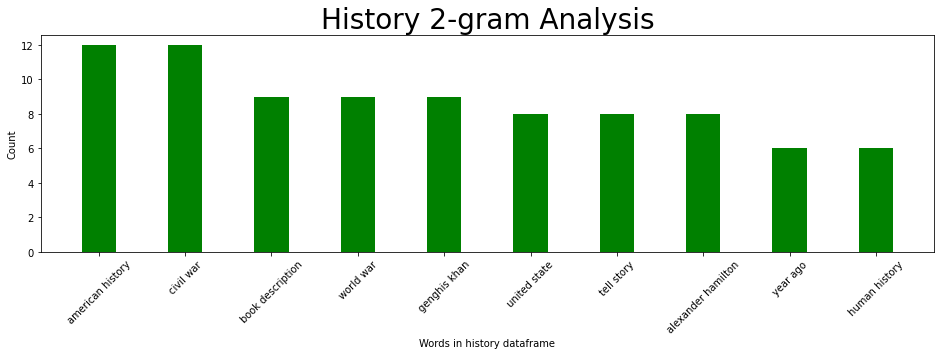

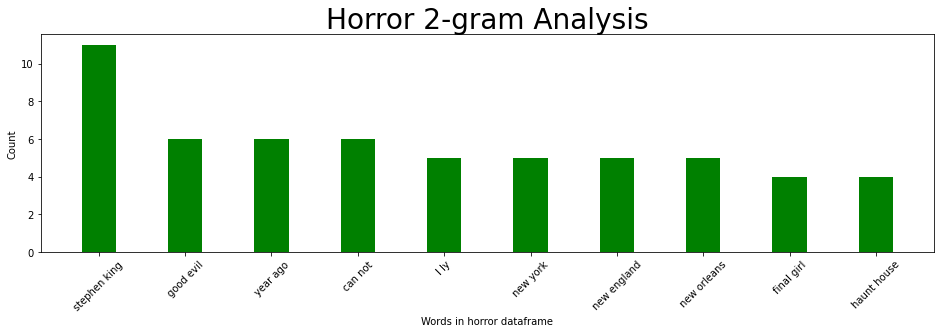

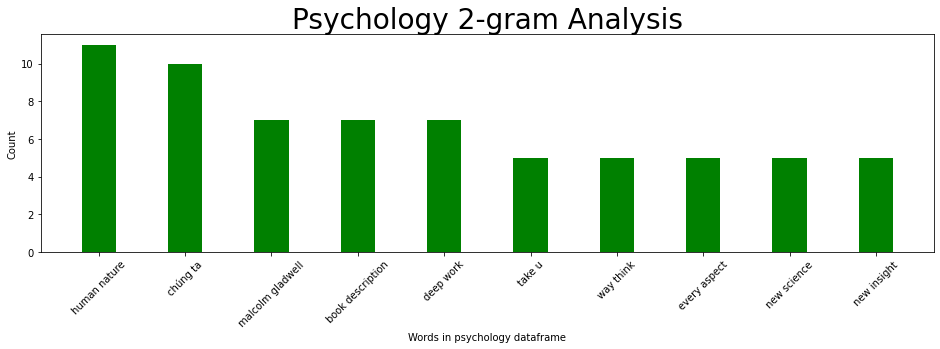

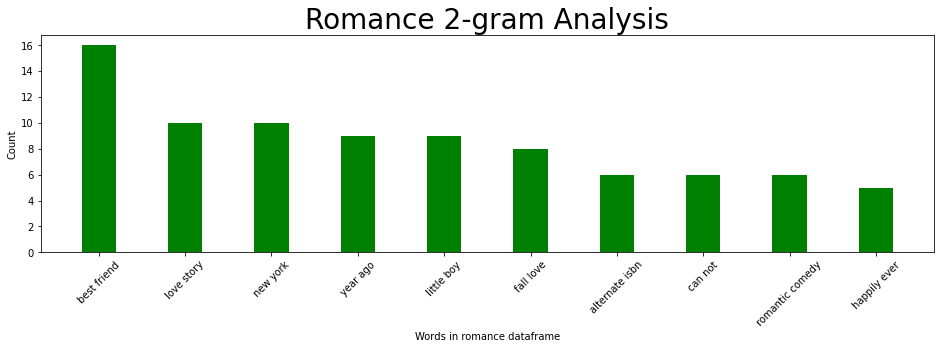

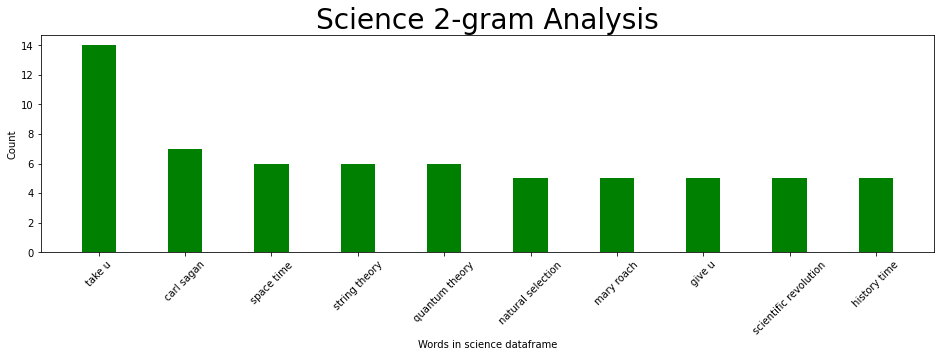

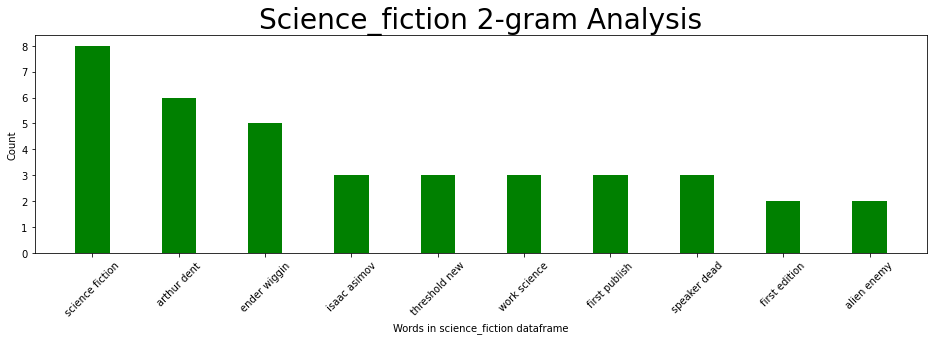

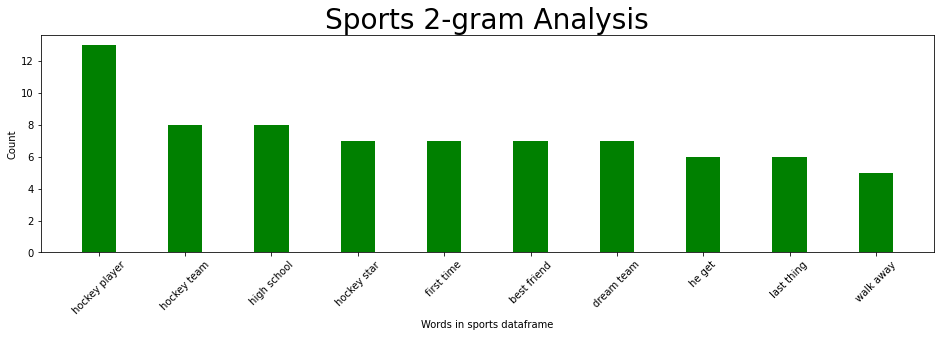

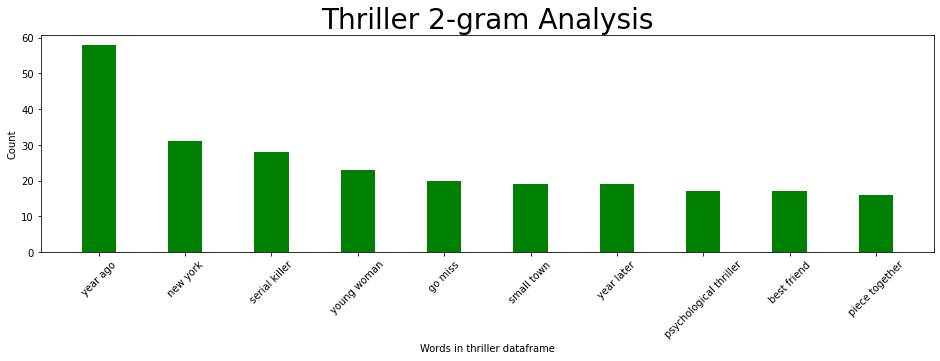

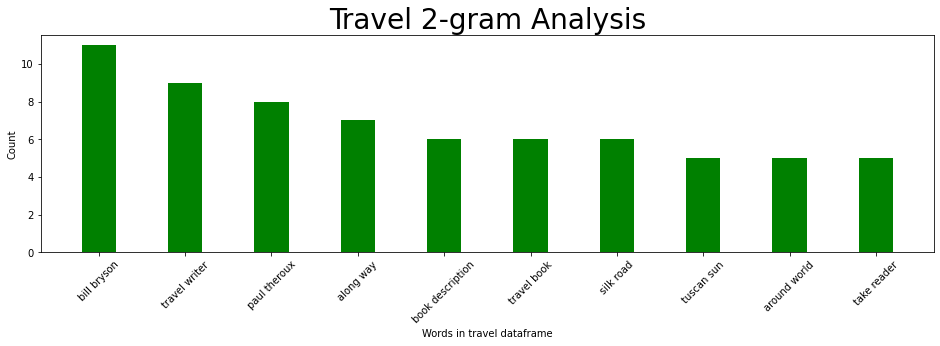

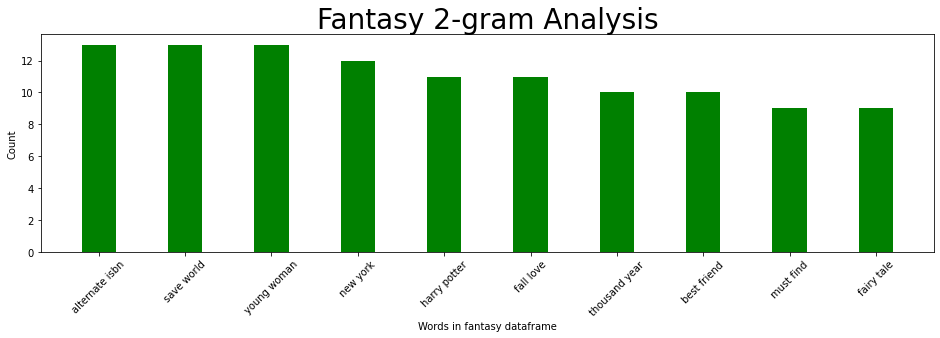

In [101]:
genres = df['genre'].unique()
for genre in genres:
    plot_genre_ngram(genre,2)

# Wordcloud visualization

In [102]:
def word_cloud(genre):
    df_genre = df.loc[df['genre']==genre]
    text = ' '.join(genre for genre in df_genre.clean_synopsis)
    wordcloud = WordCloud().generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.savefig(f'{genre}.pdf',bbox_inches='tight')
    plt.axis("off")
    plt.title(genre.capitalize(),fontsize=28)
    plt.show()

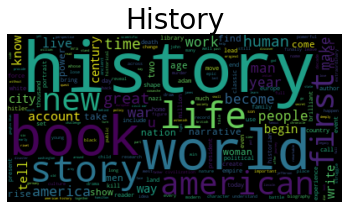

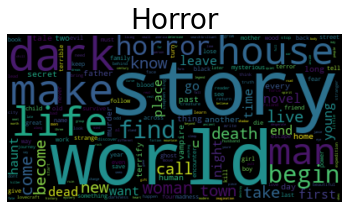

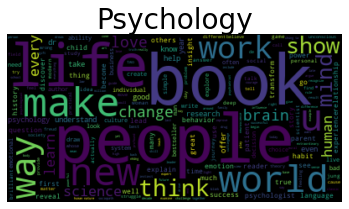

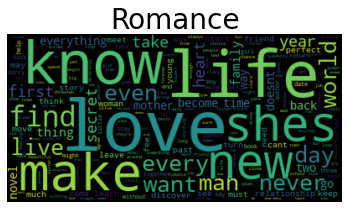

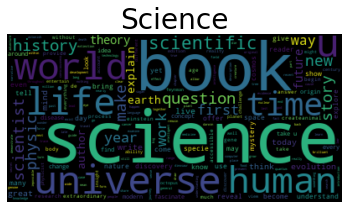

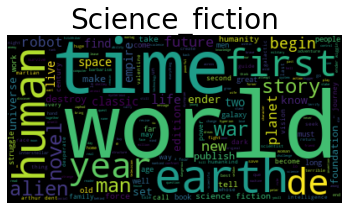

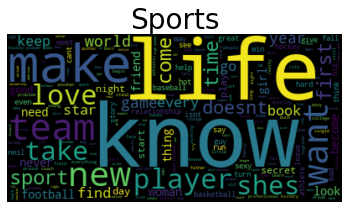

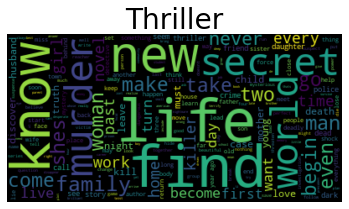

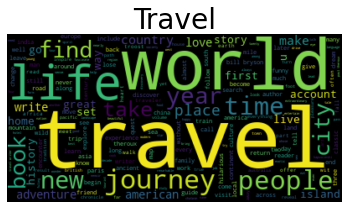

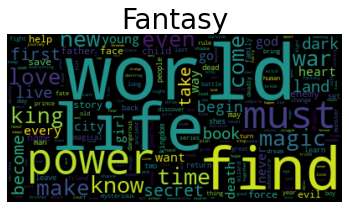

In [103]:
genres = df['genre'].unique()
for genre in genres:
    word_cloud(genre)


### Add columns with category ids as numbers

In [104]:
# Create a new column 'category_id' with encoded categories 
df['category_id'] = df['genre'].factorize()[0]
category_id_df = df[['genre', 'category_id']].drop_duplicates()
display(category_id_df)

# Dictionaries for future use
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'genre']].values)

horror_thriller_ids = [category_to_id[genre] for genre in ['horror', 'thriller']]
df['horror or thriller'] = df['category_id'].apply(lambda x: 1 if x in horror_thriller_ids else 0)
df.sample(10)


,genre,category_id
0,history,0
99,horror,1
199,psychology,2
298,romance,3
409,science,4
488,science_fiction,5
533,sports,6
612,thriller,7
1093,travel,8
1191,fantasy,9


,Unnamed: 0,title,rating,name,num_ratings,num_reviews,num_followers,synopsis,genre,clean_synopsis,category_id,horror or thriller
1404,1404,The Book of Three,3.98,Lloyd Alexander,"76,776","3,728","1,931","Taran wanted to be a hero, and looking after a...",fantasy,taran want hero look pig wasnt exactly heroic ...,9,0
782,782,The Fourth Monkey,4.20,J.D. Barker,"29,330","4,400","4,301","For over five years, the Four Monkey Killer ha...",thriller,five year four monkey killer terrorize residen...,7,1
1327,1327,Last Argument of Kings,4.31,Joe Abercrombie,"1,32,300","6,347","24,247",The end is coming. Logen Ninefingers might onl...,fantasy,end come logen ninefingers might fight go big ...,9,0
1219,1219,Stardust,4.09,Neil Gaiman,"4,09,828","22,031","2,91,280",Alternate cover edition can be found here\n\nY...,fantasy,alternate find young tristran thorn anything w...,9,0
746,746,Reckless Girls,3.61,Rachel Hawkins,"67,810","8,577","12,850",From the New York Times bestselling author of ...,thriller,author wife upstairs come deliciously wicked g...,7,1
590,590,The Hot Shot,4.16,Kristen Callihan,"16,116","1,443","12,438",First we were friends. Then we were roommates....,sports,first friends roommate want say chess copper w...,6,0
1150,1150,Toujours Provence,4.03,Peter Mayle,"28,110",594,"1,102",Taking up where his beloved A Year in Provence...,travel,take beloved year provence leave peter mayle o...,8,0
85,85,The Book Thief,4.39,Markus Zusak,"22,31,417","1,29,623",37.5k,Librarian's note: An alternate cover edition c...,history,librarian note alternate find nazi germany cou...,0,0
575,575,Fever Pitch,3.75,Nick Hornby,"38,338","1,687","8,896",For many people watching football is mere ente...,sports,many people watch football mere entertainment ...,6,0
1108,1108,The Road to Little Dribbling: Adventures of an...,3.71,Bill Bryson,"34,206","4,550",18.3k,The hilarious and loving sequel to a hilarious...,travel,hilarious love sequel hilarious love classic t...,8,0


## Visualize the data using Bar chart

genre
fantasy            348
history             99
horror             100
psychology          99
romance            111
science             79
science_fiction     45
sports              79
thriller           481
travel              98
Name: genre, dtype: int64

<Figure size 576x432 with 0 Axes>

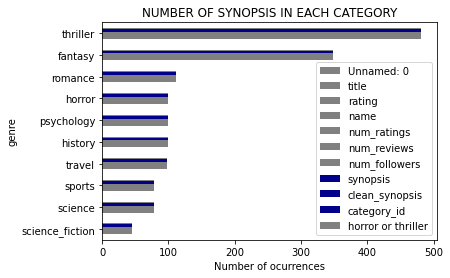

In [105]:
fig = plt.figure(figsize=(8,6))
colors = ['grey','grey','grey','grey','grey','grey','grey','darkblue','darkblue','darkblue']
df.groupby('genre').count().sort_values(['category_id']).plot.barh(
    ylim=0, color=colors, title= 'NUMBER OF SYNOPSIS IN EACH CATEGORY')
plt.xlabel('Number of ocurrences', fontsize = 10);

display(df.groupby('genre')['genre'].count())



## Create new dataframe with large categories undersampled

In [106]:
median = np.median([df[df.category_id==_id].category_id.count() for _id in df.category_id.unique()])
maxi = int(median * 1.5)
counts = defaultdict(int)
ix_to_drop = []
for _id in df.category_id.unique():
  ixs = df[df.category_id==_id].index.sort_values()
  ix_to_drop.extend(ixs[maxi:])
df2 = df.drop(ix_to_drop)
df2.info()
df_undersamples = df2

df_oversamples = df.iloc[ix_to_drop]
df_oversamples.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1006 entries, 0 to 1338
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1006 non-null   int64  
 1   title               1006 non-null   object 
 2   rating              1006 non-null   float64
 3   name                1006 non-null   object 
 4   num_ratings         1006 non-null   object 
 5   num_reviews         1006 non-null   object 
 6   num_followers       1006 non-null   object 
 7   synopsis            1006 non-null   object 
 8   genre               1006 non-null   object 
 9   clean_synopsis      1006 non-null   object 
 10  category_id         1006 non-null   int64  
 11  horror or thriller  1006 non-null   int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 102.2+ KB


,Unnamed: 0,title,rating,name,num_ratings,num_reviews,num_followers,synopsis,genre,clean_synopsis,category_id,horror or thriller
760,760,The Cousins,3.81,Karen M. McManus,"78,052","9,319","23,248","Milly, Aubrey, and Jonah Story are cousins, bu...",thriller,milly aubrey jonah story cousin barely know th...,7,1
761,761,Rainbow Six,4.11,Tom Clancy,"51,714","1,296","7,109","Over the course of nine novels, Tom Clancy’s “...",thriller,course nine novel tom clancys genius big compe...,7,1
762,762,Fool Me Once,3.94,Harlan Coben,"88,808","6,344","28,792","Former special ops pilot Maya, home from the w...",thriller,former special ops pilot maya home war see unt...,7,1
763,763,Zero Day,4.04,David Baldacci,"73,419","3,953","1,14,326",War hero John Puller is known to be the top in...,thriller,war hero john puller know top investigator u a...,7,1
764,764,Still Life With Crows,4.19,Douglas Preston,"36,137","1,819","10,785",A small Kansas town has turned into a killing ...,thriller,small kansa town turn kill ground serial kille...,7,1


# Training with undersamples

In [107]:
tfidf = TfidfVectorizer(use_idf=True, sublinear_tf=True, min_df=5,
                        #max_features=512,
                        ngram_range=(1, 2), 
                        stop_words='english')
# We transform each 'clean text' into a vector
features = tfidf.fit_transform(df2.clean_synopsis).toarray()
labels = df2.category_id
print("Each of the %d 'clean text' is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))


Each of the 1006 'clean text' is represented by 3072 features (TF-IDF score of unigrams and bigrams)


In [108]:
def test():
  # run block of code and catch warnings
  with warnings.catch_warnings():
    # Finding the three most correlated terms with each of the product categories
    N = 3
    for genre, category_id in sorted(category_to_id.items()):
      features_chi2 = chi2(features, labels == category_id)
      indices = np.argsort(features_chi2[0])
      feature_names = np.array(tfidf.get_feature_names())[indices]
      unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
      bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
      print(f"\n==> {genre}:")
      print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
      print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))
test()


==> fantasy:
  * Most Correlated Unigrams are: magic, lord, dragon
  * Most Correlated Bigrams are: save world, dark lord, harry potter

==> history:
  * Most Correlated Unigrams are: civil, hitler, history
  * Most Correlated Bigrams are: american history, history world, civil war

==> horror:
  * Most Correlated Unigrams are: macabre, eerie, horror
  * Most Correlated Bigrams are: year earlier, new england, stephen king

==> psychology:
  * Most Correlated Unigrams are: jung, psychologist, psychology
  * Most Correlated Bigrams are: human nature, new insight, malcolm gladwell

==> romance:
  * Most Correlated Unigrams are: darcy, romantic, love
  * Most Correlated Bigrams are: best friend, romantic comedy, love story

==> science:
  * Most Correlated Unigrams are: scientific, physic, universe
  * Most Correlated Bigrams are: quantum theory, mary roach, carl sagan

==> science_fiction:
  * Most Correlated Unigrams are: galactic, interstellar, alien
  * Most Correlated Bigrams are: ep

In [109]:
X = df2['clean_synopsis'] # Collection of 'clean synopsis'
y = df2['genre'] # Target or the labels we want to predict (i.e., the 10 different genres)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20,
                                                    random_state = 1)


## Models to evaluate

In [110]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=6, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0, solver = 'liblinear', C=10, penalty = 'l2'),
]

In [111]:
# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

In [112]:
from sklearn.model_selection import cross_validate
entries = []
#models = [RandomForestClassifier(n_estimators=200, max_depth=16, random_state=0, max_features="sqrt")]

for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
display(cv_df)

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.549505
1,RandomForestClassifier,1,0.577114
2,RandomForestClassifier,2,0.487562
3,RandomForestClassifier,3,0.507463
4,RandomForestClassifier,4,0.502488
5,LinearSVC,0,0.762376
6,LinearSVC,1,0.771144
7,LinearSVC,2,0.696517
8,LinearSVC,3,0.706468
9,LinearSVC,4,0.696517


## Model performance

In [113]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.726605,0.037011
LogisticRegression,0.720630,0.044159
MultinomialNB,0.618255,0.034072
RandomForestClassifier,0.524826,0.037189


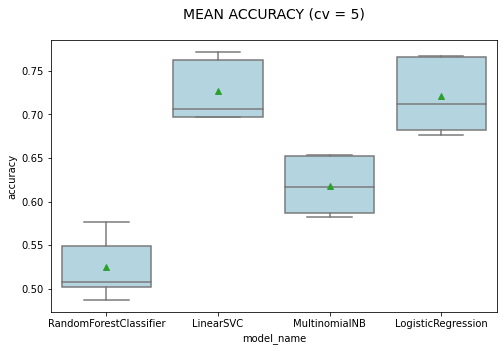

In [114]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)\n", size=14);

In [115]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df2.index, test_size=0.20, 
                                                               random_state=1)

model = LinearSVC()
model.fit(X_train, y_train)
y_pred_linearSVC = model.predict(X_test)

model = LogisticRegression(random_state=0, solver = 'liblinear', C=10, penalty = 'l2')
model.fit(X_train, y_train)
y_pred_logisticRegression = model.predict(X_test)
proba_logisticRegression = model.predict_proba(X_test)

model = RandomForestClassifier(n_estimators=200, max_depth=6, random_state=0, max_features="sqrt")
model.fit(X_train, y_train)
y_pred_RFC = model.predict(X_test) 


## Classification reports

In [116]:
# Classification report
# print('\t\t\t\tCLASSIFICATIION METRICS\n')
# print(metrics.classification_report(y_test, y_pred, 
#                                     target_names= df['genre'].unique()))
# Classification report
names = ["linearSVC", "logisticRegression", "RandomForest"]
for name, y_pred in zip(names, [y_pred_linearSVC, y_pred_logisticRegression, y_pred_RFC]):
  print(f'\t{name} CLASSIFICATIION METRICS\n')
  print(metrics.classification_report(y_test, y_pred, target_names= df['genre'].unique()))
  print()

	linearSVC CLASSIFICATIION METRICS

                 precision    recall  f1-score   support

        history       0.82      0.82      0.82        22
         horror       0.67      0.57      0.62        21
     psychology       0.95      0.86      0.90        21
        romance       0.59      0.68      0.63        19
        science       0.83      0.77      0.80        13
science_fiction       1.00      0.60      0.75         5
         sports       0.83      0.65      0.73        23
       thriller       0.68      0.81      0.74        31
         travel       0.71      0.94      0.81        16
        fantasy       0.93      0.90      0.92        31

       accuracy                           0.78       202
      macro avg       0.80      0.76      0.77       202
   weighted avg       0.79      0.78      0.78       202


	logisticRegression CLASSIFICATIION METRICS

                 precision    recall  f1-score   support

        history       0.78      0.82      0.80        22
  

C:\Users\rasmu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rasmu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rasmu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [117]:
def plot_confusion(y_test, y_pred, title, figsize=(8,8)):
  conf_mat = confusion_matrix(y_test, y_pred)
  fig, ax = plt.subplots(figsize=figsize)
  sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
              xticklabels=category_id_df.genre.values, 
              yticklabels=category_id_df.genre.values)
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.title(f"{title}", size=16);


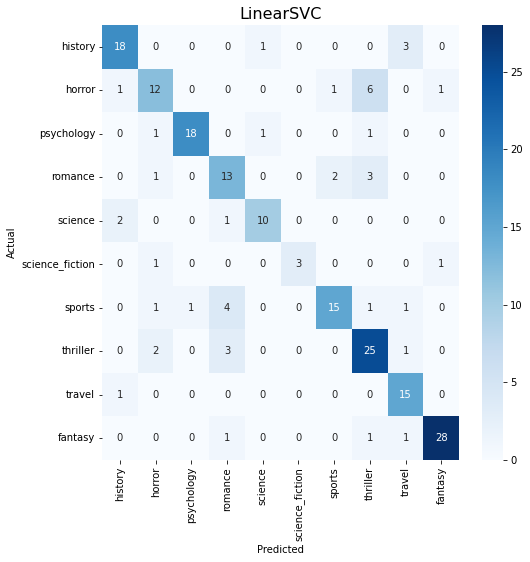

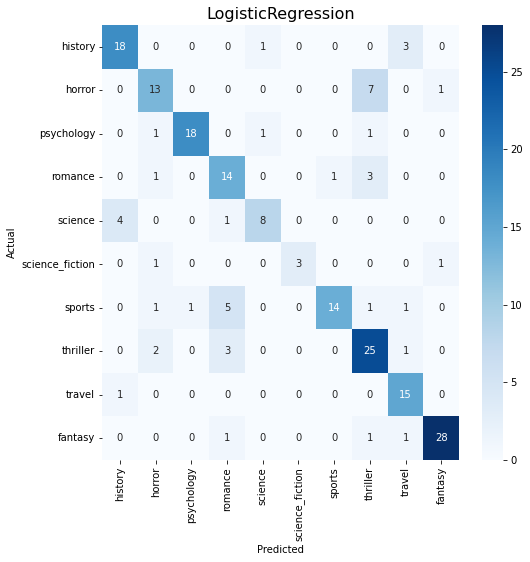

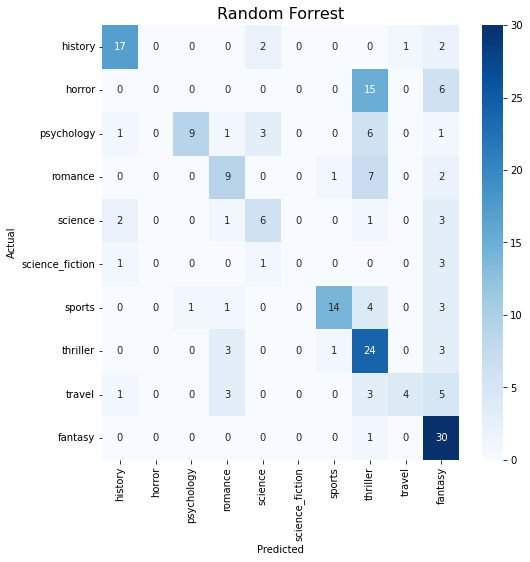

In [118]:
plot_confusion(y_test, y_pred_linearSVC, "LinearSVC")
plot_confusion(y_test, y_pred_logisticRegression, "LogisticRegression")
plot_confusion(y_test, y_pred_RFC, "Random Forrest")


# Trying horror/thriller as 1 category and the rest as an other

In [119]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        # max_features=256,  # 128 er god til RFC
                        ngram_range=(1, 2), 
                        stop_words='english')
# We transform each 'clean text' into a vector
features = tfidf.fit_transform(df.clean_synopsis).toarray()
labels = df["horror or thriller"]
print("Each of the %d 'clean text' is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 1539 'clean text' is represented by 4318 features (TF-IDF score of unigrams and bigrams)


In [120]:
X = df['clean_synopsis'] # Collection of 'clean synopsis'
y = df['horror or thriller'] # Target or the labels we want to predict (i.e., the 2 different genres)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20,
                                                    random_state = 0)


In [121]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=6, random_state=0, max_features="sqrt"),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0, solver = 'liblinear', C=10, penalty = 'l2'),
]

In [122]:
# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

In [123]:
entries = []
#models = [RandomForestClassifier(n_estimators=200, max_depth=16, random_state=0, max_features="sqrt")]

for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [124]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.851199,0.053082
LogisticRegression,0.851849,0.058704
MultinomialNB,0.846681,0.073928
RandomForestClassifier,0.705681,0.044173


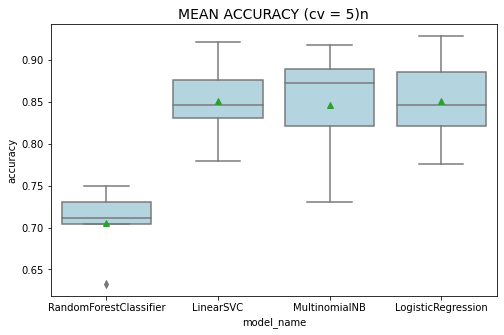

In [125]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)n", size=14);

In [126]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df.index, test_size=0.20, 
                                                               random_state=1)
model1 = LinearSVC()
model1.fit(X_train, y_train)
y_pred_linearSVC = model1.predict(X_test)

model2 = LogisticRegression(random_state=0, solver = 'liblinear', C=10, penalty = 'l2')
model2.fit(X_train, y_train)
y_pred_logisticRegression = model2.predict(X_test)
proba_logisticRegression = model2.predict_proba(X_test)

model3 = RandomForestClassifier(n_estimators=200, max_depth=6, random_state=0, max_features="sqrt")
#model3 = RandomForestClassifier(n_estimators=200, max_depth=6, random_state=0, max_features=64)
model3.fit(X_train, y_train)
y_pred_RFC = model3.predict(X_test)
proba_RFC = model3.predict_proba(X_test)

model4 = MultinomialNB()
model4.fit(X_train, y_train)
y_pred_multinomialNB = model4.predict(X_test)
proba_multinomialNB = model4.predict_proba(X_test)

print(len(y_pred_linearSVC))
coin = np.sum(y_pred_linearSVC == y_pred_logisticRegression)
diff = np.sum(y_pred_linearSVC != y_pred_logisticRegression)
print(y_pred_linearSVC[:2])
# y_pred = (y_pred_linearSVC == y_pred_logisticRegression) * y_pred_logisticRegression

308
[0 0]


In [127]:
# Classification report
names = ["linearSVC", "logisticRegression", "pred_multinomialNB", "RandomForest"]
for name, y_pred in zip(names, [y_pred_linearSVC, y_pred_logisticRegression, y_pred_multinomialNB, y_pred_RFC]):
  print(f'\t{name} CLASSIFICATIION METRICS\n')
  print(metrics.classification_report(y_test, y_pred))
  print()


	linearSVC CLASSIFICATIION METRICS

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       180
           1       0.92      0.78      0.84       128

    accuracy                           0.88       308
   macro avg       0.89      0.87      0.87       308
weighted avg       0.88      0.88      0.88       308


	logisticRegression CLASSIFICATIION METRICS

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       180
           1       0.92      0.75      0.83       128

    accuracy                           0.87       308
   macro avg       0.88      0.85      0.86       308
weighted avg       0.88      0.87      0.87       308


	pred_multinomialNB CLASSIFICATIION METRICS

              precision    recall  f1-score   support

           0       0.82      0.99      0.89       180
           1       0.98      0.69      0.81       128

    accuracy                           0.86       308


In [128]:
def plot_confusion_ht(y_test, y_pred, title, figsize=(4,4)):
  conf_mat = confusion_matrix(y_test, y_pred)
  fig, ax = plt.subplots(figsize=figsize)
  sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
              xticklabels=["other", "horror or thriller"], 
              yticklabels=["other", "horror or thriller"])
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.title(f"{title}", size=16);


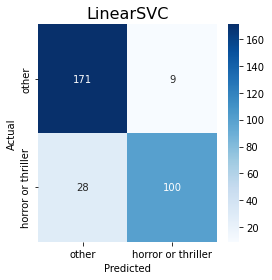

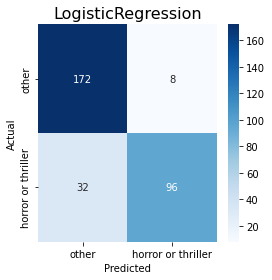

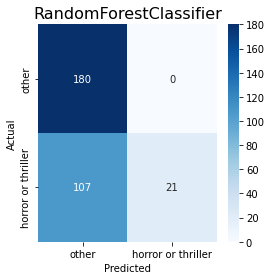

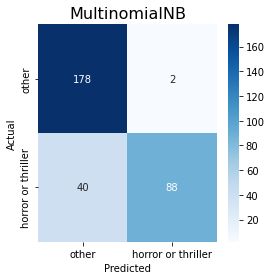

In [129]:
plot_confusion_ht(y_test, y_pred_linearSVC, "LinearSVC"); plt.show()
plot_confusion_ht(y_test, y_pred_logisticRegression, "LogisticRegression"); plt.show()
plot_confusion_ht(y_test, y_pred_RFC, "RandomForestClassifier"); plt.show()
plot_confusion_ht(y_test, y_pred_multinomialNB, "MultinomialNB"); plt.show()

### Combine predictions

[0 0 3 0 0 3 0 0 0 1 1 0 3 0 0 2 0 0 1 0 3 3 0 3 0 0 0 0 0 0 3 0 0 0 0 0 3
 3 0 0 2 0 3 3 3 3 0 0 0 3 0 0 3 0 0 1 0 0 0 0 0 3 0 3 0 2 0 0 0 3 0 0 3 0
 0 0 0 0 0 0 3 0 0 0 3 3 3 0 3 0 0 0 0 0 2 0 0 0 0 3 0 0 0 0 0 0 0 3 0 0 3
 0 1 2 3 3 3 3 0 3 0 0 0 0 0 3 3 3 0 3 0 0 3 0 3 0 0 3 0 2 0 3 0 3 3 0 3 0
 0 3 0 2 0 0 3 0 0 0 0 0 0 0 3 3 0 0 0 0 0 3 1 0 0 2 3 0 0 0 0 0 2 3 0 3 0
 3 0 2 0 3 3 0 0 0 0 3 0 0 0 0 0 3 0 0 3 3 0 0 2 0 0 0 0 0 0 2 0 3 0 3 0 0
 3 0 0 0 0 2 0 3 3 0 0 0 3 3 0 0 0 0 3 0 3 0 0 0 0 0 0 0 0 0 0 3 3 3 0 0 3
 3 3 3 0 3 2 0 0 0 0 3 0 3 0 0 2 3 0 0 3 0 0 0 0 0 1 0 0 0 3 0 3 0 3 0 3 3
 0 2 0 3 0 0 3 3 3 0 0 0]


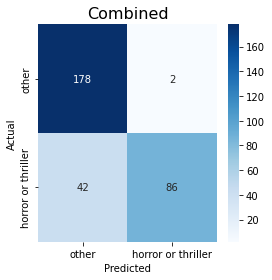

In [130]:
#plot_confusion_ht(y_test, y_pred_linearSVC, "LinearSVC"); plt.show()

pred_sum = y_pred_linearSVC + y_pred_logisticRegression + y_pred_multinomialNB
print(pred_sum)
mask1 = (pred_sum > 2).astype(int)
mask0 = (pred_sum < 2).astype(int)
pred = y_pred_RFC | mask1
pred &= (1 - ((1 - pred) & mask0))


plot_confusion_ht(y_test, pred, "Combined"); plt.show()


combined_pred = np.zeros_like(y_pred_RFC)
#print(combined_pred)

# Try to differentiate between horror and thriller

## Keep only horror and thriller as a new dataframe df_ht

In [131]:
#ids = category_to_id = dict(category_id_df.values)
df_ht = df_undersamples.copy()
for genre in category_to_id.keys():
  if genre not in ['horror', 'thriller']:
    df_ht.drop(df_ht[df_ht["genre"]==genre].index.values, inplace=True)
df_ht.groupby('genre')['genre'].count()

genre
horror      100
thriller    148
Name: genre, dtype: int64

In [132]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        # max_features=256, 
                        ngram_range=(1, 2), 
                        stop_words='english')
# We transform each 'clean text' into a vector
features = tfidf.fit_transform(df_ht.clean_synopsis).toarray()
labels = df_ht["genre"]
print("Each of the %d 'clean text' is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 248 'clean text' is represented by 740 features (TF-IDF score of unigrams and bigrams)


In [133]:
X = df_ht['clean_synopsis'] # Collection of 'clean synopsis'
y = df_ht['genre'] # Target or the labels we want to predict (i.e., the 2 different genres)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20,
                                                    random_state = 0)


In [134]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=6, random_state=0, max_features="sqrt"),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0, solver = 'liblinear', C=10, penalty = 'l2'),
]

In [135]:
# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

In [136]:
entries = []

for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [137]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.753878,0.055205
LogisticRegression,0.741714,0.053478
MultinomialNB,0.725551,0.046213
RandomForestClassifier,0.673469,0.024607


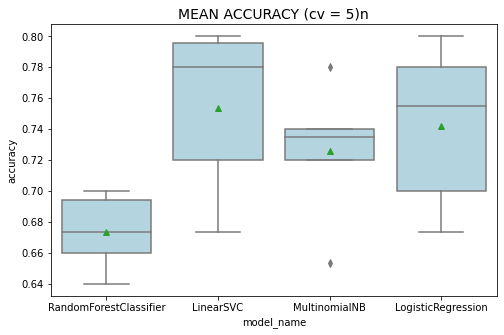

In [138]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)n", size=14);

In [139]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df_ht.index, test_size=0.20, 
                                                               random_state=1)
model1 = LinearSVC()
model1.fit(X_train, y_train)
y_pred_linearSVC = model1.predict(X_test)

model2 = LogisticRegression(random_state=0, solver = 'liblinear', C=10, penalty = 'l2')
model2.fit(X_train, y_train)
y_pred_logisticRegression = model2.predict(X_test)
proba_logisticRegression = model2.predict_proba(X_test)

model3 = RandomForestClassifier(n_estimators=200, max_depth=6, random_state=0, max_features="sqrt")
#model3 = RandomForestClassifier(n_estimators=200, max_depth=6, random_state=0, max_features=64)
model3.fit(X_train, y_train)
y_pred_RFC = model3.predict(X_test)
proba_RFC = model3.predict_proba(X_test)

model4 = MultinomialNB()
model4.fit(X_train, y_train)
y_pred_multinomialNB = model4.predict(X_test)
proba_multinomialNB = model4.predict_proba(X_test)


In [140]:
# Classification report
names = ["linearSVC", "logisticRegression", "pred_multinomialNB", "RandomForest"]
for name, y_pred in zip(names, [y_pred_linearSVC, y_pred_logisticRegression, y_pred_multinomialNB, y_pred_RFC]):
  print(f'\t{name} CLASSIFICATIION METRICS\n')
  print(metrics.classification_report(y_test, y_pred))
  print()


	linearSVC CLASSIFICATIION METRICS

              precision    recall  f1-score   support

      horror       0.89      0.67      0.76        24
    thriller       0.75      0.92      0.83        26

    accuracy                           0.80        50
   macro avg       0.82      0.79      0.79        50
weighted avg       0.82      0.80      0.80        50


	logisticRegression CLASSIFICATIION METRICS

              precision    recall  f1-score   support

      horror       0.89      0.67      0.76        24
    thriller       0.75      0.92      0.83        26

    accuracy                           0.80        50
   macro avg       0.82      0.79      0.79        50
weighted avg       0.82      0.80      0.80        50


	pred_multinomialNB CLASSIFICATIION METRICS

              precision    recall  f1-score   support

      horror       1.00      0.54      0.70        24
    thriller       0.70      1.00      0.83        26

    accuracy                           0.78        50


In [141]:
def plot_confusion_ht(y_test, y_pred, title, figsize=(4,4)):
  conf_mat = confusion_matrix(y_test, y_pred)
  fig, ax = plt.subplots(figsize=figsize)
  sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
              xticklabels=["horror", "thriller"], 
              yticklabels=["horror", "thriller"])
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.title(f"{title}", size=16);


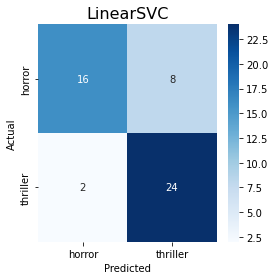

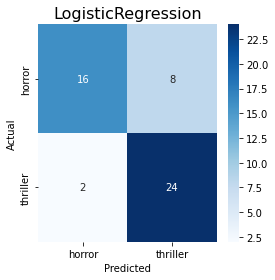

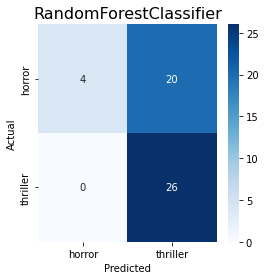

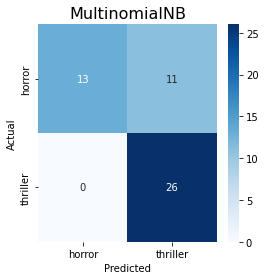

In [142]:
plot_confusion_ht(y_test, y_pred_linearSVC, "LinearSVC"); plt.show()
plot_confusion_ht(y_test, y_pred_logisticRegression, "LogisticRegression"); plt.show()
plot_confusion_ht(y_test, y_pred_RFC, "RandomForestClassifier"); plt.show()
plot_confusion_ht(y_test, y_pred_multinomialNB, "MultinomialNB"); plt.show()

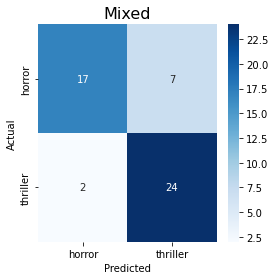

              precision    recall  f1-score   support

      horror       0.89      0.71      0.79        24
    thriller       0.77      0.92      0.84        26

    accuracy                           0.82        50
   macro avg       0.83      0.82      0.82        50
weighted avg       0.83      0.82      0.82        50



In [143]:
y_pred_multinomialNB
y_pred = y_pred_multinomialNB.copy()
for i in range(y_pred.shape[0]):
  if y_pred[i] == 'horror':
    continue
  if y_pred_RFC[i] == 'horror':
    y_pred[i] = 'horror'
    continue
  y_pred[i] = y_pred_linearSVC[i]
plot_confusion_ht(y_test, y_pred, "Mixed"); plt.show()
print(metrics.classification_report(y_test, y_pred))

# Try different models with StratifiedKfold

In [144]:
# models to evaluate
models = [
    LinearSVC(),
    LogisticRegression(random_state=0, solver = 'liblinear', C=10, penalty = 'l2'),
    MultinomialNB(),
    RandomForestClassifier(n_estimators=200, max_depth=10, random_state=0),
]
model_names = ["LinearSVC", "LogisticRegression", "MultinomialNB", "RandomForestClassifier"]

In [145]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from statistics import mean, stdev

_df = df

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=3,
                        # max_features=100, 
                        ngram_range=(1, 2), 
                        stop_words='english')
# We transform each 'clean text' into a vector
features = tfidf.fit_transform(_df.clean_synopsis).toarray()
#features = tfidf.fit_transform(_df.synopsis).toarray()
labels = _df["genre"]
df_features = pd.DataFrame(features)
df_labels = pd.DataFrame(labels)

print("Each of the %d 'clean text' is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

entries = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    for model, model_name in zip(models, model_names):
        accu_stratified = []
        precisions = []
        recalls = []
        f1_scores = []
        for fold_idx, (train_index, test_index) in enumerate(skf.split(features, labels), 0):
            X_train_fold, X_test_fold = df_features.iloc[train_index], df_features.iloc[test_index]
            y_train_fold, y_test_fold = df_labels.iloc[train_index], df_labels.iloc[test_index]

            # model = LogisticRegression(random_state=0, solver = 'liblinear', C=10, penalty = 'l2')
            model.fit(X_train_fold, y_train_fold)
            accuracy = model.score(X_test_fold, y_test_fold)
            accu_stratified.append(accuracy)

            y_pred = model.predict(X_test_fold)
            
            precision = metrics.precision_score(y_test_fold, y_pred, average='weighted')
            recall = metrics.recall_score(y_test_fold, y_pred, average='weighted')
            f1_score = metrics.f1_score(y_test_fold, y_pred, average='weighted')
            precisions.append(precision)
            recalls.append(recall)
            f1_scores.append(f1_score)

            entries.append((model_name, fold_idx, accuracy, precision, recall, f1_score))
            # Classification report
            #print(f'\t{model_name} CLASSIFICATIION METRICS\n')
            #print(metrics.classification_report(y_test_fold, y_pred))
            #print()

        # Print the output.
        print(f'Results for {model_name}')
        print('List of possible accuracy: ', [f"{a:.3f}" for a in accu_stratified], f"{mean(accu_stratified):.3f}")
        print('List of possible precision:', [f"{p:.3f}" for p in precisions], f"{mean(precisions):.3f}")
        print('List of possible recalls:  ', [f"{r:.3f}" for r in recalls], f"{mean(recalls):.3f}")
        print('List of possible f1-scores:', [f"{f1:.3f}" for f1 in f1_scores], f"{mean(f1_scores):.3f}")
        min_acc = min(accu_stratified)*100
        max_acc = max(accu_stratified)*100
        mean_acc = mean(accu_stratified)*100
        stddev_acc = stdev(accu_stratified)
        print(f"Acc: {min_acc:.3f} - {max_acc:.3f}  Mean: {mean_acc:.3f}  StdDev: {stddev_acc:.5f}")


Each of the 1539 'clean text' is represented by 7992 features (TF-IDF score of unigrams and bigrams)
Results for LinearSVC
List of possible accuracy:  ['0.795', '0.756', '0.795', '0.776', '0.752'] 0.775
List of possible precision: ['0.809', '0.745', '0.799', '0.784', '0.751'] 0.777
List of possible recalls:   ['0.795', '0.756', '0.795', '0.776', '0.752'] 0.775
List of possible f1-scores: ['0.773', '0.726', '0.775', '0.749', '0.732'] 0.751
Acc: 75.244 - 79.545  Mean: 77.516  StdDev: 0.02055
Results for LogisticRegression
List of possible accuracy:  ['0.750', '0.734', '0.769', '0.753', '0.736'] 0.749
List of possible precision: ['0.811', '0.750', '0.780', '0.739', '0.770'] 0.770
List of possible recalls:   ['0.750', '0.734', '0.769', '0.753', '0.736'] 0.749
List of possible f1-scores: ['0.712', '0.702', '0.737', '0.711', '0.705'] 0.713
Acc: 73.377 - 76.948  Mean: 74.853  StdDev: 0.01444
Results for MultinomialNB
List of possible accuracy:  ['0.490', '0.510', '0.497', '0.490', '0.498'] 0.

In [146]:
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy', 'precision', 'recall', 'f1_score'])
display(cv_df)

,model_name,fold_idx,accuracy,precision,recall,f1_score
0,LinearSVC,0,0.795455,0.808726,0.795455,0.772640
1,LinearSVC,1,0.756494,0.744942,0.756494,0.725668
2,LinearSVC,2,0.795455,0.798665,0.795455,0.775254
3,LinearSVC,3,0.775974,0.784007,0.775974,0.748528
4,LinearSVC,4,0.752443,0.750960,0.752443,0.732170
5,LogisticRegression,0,0.750000,0.810676,0.750000,0.711658
6,LogisticRegression,1,0.733766,0.749693,0.733766,0.701780
7,LogisticRegression,2,0.769481,0.780415,0.769481,0.737188
8,LogisticRegression,3,0.753247,0.739256,0.753247,0.710740
9,LogisticRegression,4,0.736156,0.770183,0.736156,0.705279


In [147]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()
mean_precision = cv_df.groupby('model_name').precision.mean()
mean_recall = cv_df.groupby('model_name').recall.mean()
mean_f1_score = cv_df.groupby('model_name').f1_score.mean()

acc = pd.concat([mean_accuracy, std_accuracy, mean_precision, mean_recall, mean_f1_score], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation', 'mean_precision', 'mean_recall', 'mean_f1_score']
acc

,Mean Accuracy,Standard deviation,mean_precision,mean_recall,mean_f1_score
model_name,,,,,
LinearSVC,0.775164,0.020548,0.777460,0.775164,0.750852
LogisticRegression,0.748530,0.014443,0.770045,0.748530,0.713329
MultinomialNB,0.497077,0.007986,0.384552,0.497077,0.370553
RandomForestClassifier,0.472397,0.019133,0.457171,0.472397,0.363243


In [148]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()
mean_precision = cv_df.groupby('model_name').precision.mean()
mean_recall = cv_df.groupby('model_name').recall.mean()
mean_f1_score = cv_df.groupby('model_name').f1_score.mean()

acc = pd.concat([mean_accuracy, std_accuracy, mean_precision, mean_recall, mean_f1_score], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation', 'mean_precision', 'mean_recall', 'mean_f1_score']
acc

,Mean Accuracy,Standard deviation,mean_precision,mean_recall,mean_f1_score
model_name,,,,,
LinearSVC,0.775164,0.020548,0.777460,0.775164,0.750852
LogisticRegression,0.748530,0.014443,0.770045,0.748530,0.713329
MultinomialNB,0.497077,0.007986,0.384552,0.497077,0.370553
RandomForestClassifier,0.472397,0.019133,0.457171,0.472397,0.363243
